# Introduction to Regression with Neural Networks in TensorFlow

In [65]:
import tensorflow as tf
tf.__version__

'2.15.0'

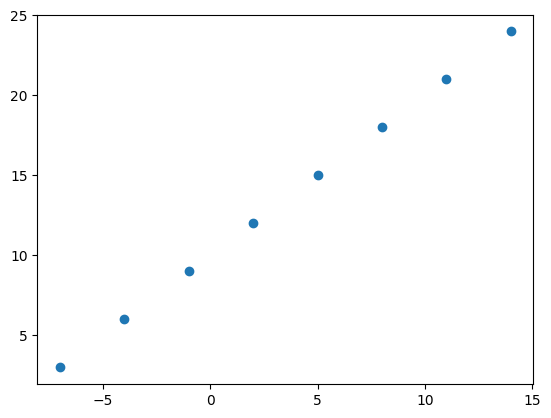

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and Output shapes

In [67]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [68]:
X = tf.constant(X)
y = tf.constant(y)

X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modeliing with TensorFlow


---


1. **Creating a model** - *define the input and output layers, as well as the hidden layers of a deep learning model.*


---


2. **Compiling a model** - *define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).*


---


3. **Fitting a model** - *letting the model try the patterns between X and y (features and labels).*

---



In [69]:
# Set random seed
tf.random.set_seed(28)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = 1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 548ms/step - loss: 21.8869 - mae: 21.8869
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 21.4938 - mae: 21.4938
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 21.1007 - mae: 21.1007
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 20.7076 - mae: 20.7076
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 20.3575 - mae: 20.3575


In [70]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [71]:
# Try and make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[-23.762506]], dtype=float32)

## Improving our model

We can improve our models, by altering the steps we took to create a model.


---


1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, chnage the activation function of each layer.


---


2. **Compiling the model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.


---


2. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


---



In [72]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = 1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 377ms/step - loss: 15.4171 - mae: 15.4171
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 15.1358 - mae: 15.1358
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.8955 - mae: 14.8955
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.7631 - mae: 14.7631
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.6305 - mae: 14.6305
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 14.4980 - mae: 14.4980
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3655 - mae: 14.3655
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2330 - mae: 14.2330
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1005 - mae: 14.1005
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9680 - mae: 13.9680
Epoch 11/100
1/1 [==============================

In [73]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[29.748755]], dtype=float32)

In [74]:
# Let's try again

# 1. Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = 1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 838ms/step - loss: 13.4187 - mae: 13.4187
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0093 - mae: 12.0093
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8385 - mae: 10.8385
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7944 - mae: 9.7944
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7051 - mae: 8.7051
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5627 - mae: 7.5627
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 6.3488 - mae: 6.3488
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 5.0499 - mae: 5.0499
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 3.9215 - mae: 3.9215
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 3.9346 - mae: 3.9346
Epoch 11/100
1/1 [==============================] - 0s 13ms/st

In [75]:
model.predict([17.0])

1/1 [==============================] - 0s 78ms/step


array([[27.64031]], dtype=float32)

In [76]:
model.predict([23.0])

1/1 [==============================] - 0s 44ms/step


array([[34.049526]], dtype=float32)

## Evaluating a model performance

In [77]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [78]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

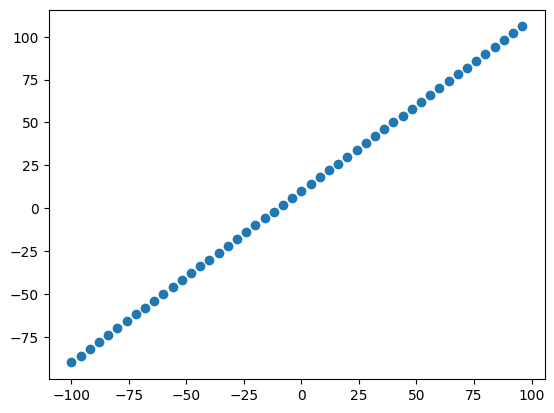

In [79]:
plt.scatter(X, y)

### **The 3 sets to focus**
* **Training set** - *model learns from this data, which is typically 70-80% of the total data you have available.*
* **Validation set** - *the model gets tuned on this data, which is typically 10-15% of the data available.*
* **Test set** - *the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.*

In [80]:
# Check the len of samples
len(X)

50

In [81]:
# Split the data into terain and test sets
train_X = X[:40] # first 40
test_X = X[40:] # last 10

train_y = y[:40]
test_y = y[40:]

len(train_X), len(train_y), len(test_X), len(test_y)

(40, 40, 10, 10)

### Visualizing the data

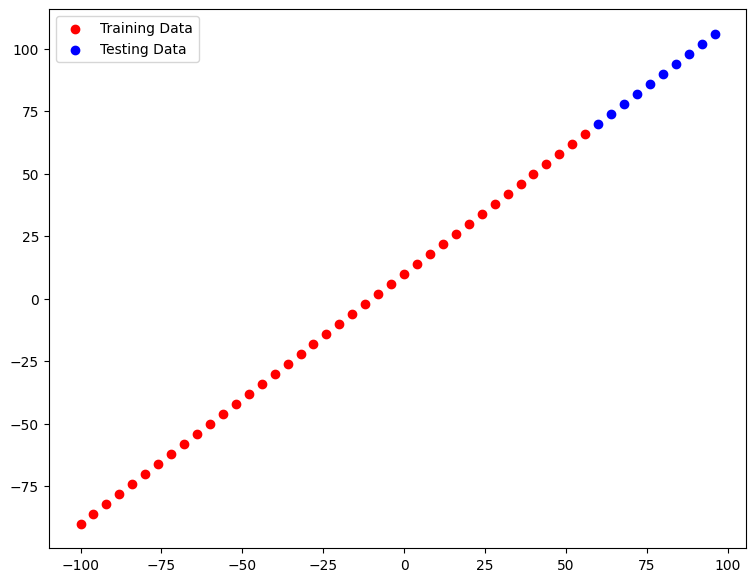

In [82]:
plt.figure(figsize = (9,7))
# plot the training data in red
plt.scatter(train_X, train_y, c = 'r', label = 'Training Data')
# plot the testing data in blue
plt.scatter(test_X, test_y, c = 'b', label = 'Testing Data')
# Show the legend
plt.legend()

In [83]:
# Lets create another neural network

# 1. Creating the model
model = tf.keras.Sequential(name = 'Model_1')
model.add(tf.keras.layers.Dense(300, name = 'input_layer', input_shape = [1], activation = 'relu'))
model.add(tf.keras.layers.Dense(1, name = 'output_layer'))

# 2, Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])

### Visualizing the model

In [84]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 300)               600       
                                                                 
 output_layer (Dense)        (None, 1)                 301       
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** -> *total number of parameters in the model.*
* **Trainable params** -> *these are parameters (patterns) the model can update as it trains.*
* **Non-trainable params** -> *these params aren't updated during training (this is typical when you bring in already learn patters or parameters from other models during **transfer learning**).*

In [85]:
# 3. Fitting the model
model.fit(tf.expand_dims(train_X, axis = 1), train_y, epochs = 100, verbose = 0)

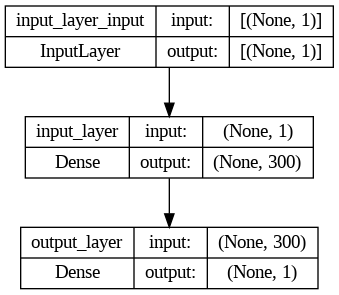

In [86]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

### Visualizing our model's predictions

In [87]:
# Make some predictions
y_pred = model.predict(test_X)
y_pred

1/1 [==============================] - 0s 74ms/step


array([[ 73.40601 ],
       [ 78.18434 ],
       [ 82.96267 ],
       [ 87.74099 ],
       [ 92.519325],
       [ 97.297646],
       [102.07598 ],
       [106.854294],
       [111.63264 ],
       [116.41095 ]], dtype=float32)

In [146]:
# Let's create a plotting function
def plot_predictions(train_data = train_X,
                      train_labels = train_y,
                      test_data = test_X,
                      test_labels = test_y,
                      predictions = None):
  '''
  Plots training data, test data and compares predictions to ground truth labels
  '''
  assert len(train_data) == len(train_labels), "Train data and labels must have the same length"
  assert len(test_data) == len(test_labels), "Test data and labels must have the same length"

  plt.figure(figsize=(9, 7))
  plt.scatter(train_data, train_labels, c='r', label='Training Data')
  plt.scatter(test_data, test_labels, c='b', label='Testing Data')
  plt.plot(test_data, predictions, c='g', label='Predictions')
  plt.legend()
  plt.xlabel('Input Data')
  plt.ylabel('Output')
  plt.title('Plot of Training Data, Testing Data, and Predictions')
  plt.show()


In [ ]:
plot_predictions(predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Since we're working on regression, two of the main metrics:
* MAE - mean absolute error, 'on average, how wrong is each of my model's predictions'
* MSE - mean squared error, 'square the average errors'

In [91]:
# Evaluate the model on the test
model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 165ms/step - loss: 6.9085 - mae: 6.9085


[6.90848445892334, 6.90848445892334]

In [92]:
# Calculate the mean absolute eroor
mae = tf.metrics.mean_absolute_error(test_y, tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.9084845>

In [93]:
# Calculate the mean absolute eroor
mse = tf.metrics.mean_squared_error(test_y, tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=52.724953>

In [94]:
# Make a function to reuse MAE and MSE
def calculate_mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(tf.cast(y_true, dtype = tf.float32), tf.squeeze(y_pred))

def calculate_mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(tf.cast(y_true, dtype = tf.float32), tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in this data.

**`MODEL_1`**

1/1 [==============================] - 0s 55ms/step
MAE: 19.54754066467285
MSE: 384.70361328125


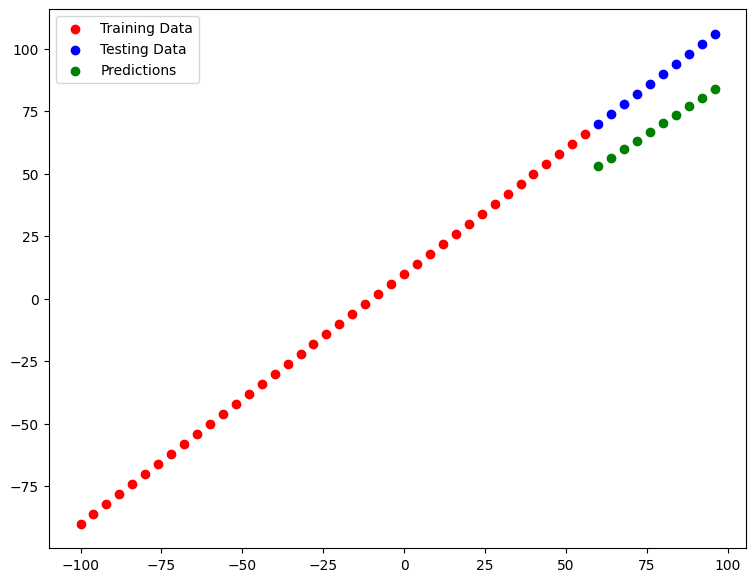

In [95]:
# Set random seed
tf.random.set_seed(28)

# 1. Create the model
model_1 = tf.keras.Sequential(name = 'Model_1')
model_1.add(tf.keras.layers.Dense(1, input_shape = [1]))

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Fit the model
model_1.fit(tf.expand_dims(train_X, axis = 1), train_y, epochs = 100, verbose = 0)

# Predicting with the model
pred_y1 = model_1.predict(test_X)

# Visualizing the predictions
plot_predictions(predictions = pred_y1)

# Calculating MAE and MSE
mae_1 = calculate_mae(test_y, pred_y1)
mse_1 = calculate_mse(test_y, pred_y1)

# Printing MAE and MSE
print(f'MAE: {mae_1}\nMSE: {mse_1}')

**`MODEL_2`**

1/1 [==============================] - 0s 63ms/step
MAE: 2.5370306968688965
MSE: 6.552079677581787


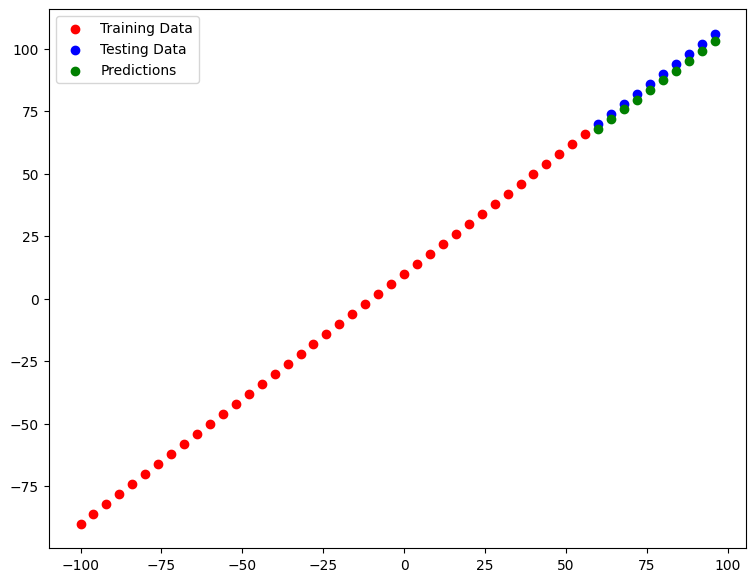

In [96]:
# Set random seed
tf.random.set_seed(28)

# 1. Create the model
model_2 = tf.keras.Sequential(name = 'Model_2')
model_2.add(tf.keras.layers.Dense(100, input_shape = [1], activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['mae'])

# Fit the model
model_2.fit(tf.expand_dims(train_X, axis = 1), train_y, epochs = 100, verbose = 0)

# Predicting with the model
pred_y2 = model_2.predict(test_X)

# Visualizing the predictions
plot_predictions(predictions = pred_y2)

# Calculating MAE and MSE
mae_2 = calculate_mae(test_y, pred_y2)
mse_2 = calculate_mse(test_y, pred_y2)

# Printing MAE and MSE
print(f'MAE: {mae_2}\nMSE: {mse_2}')

**`MODEL_3`**

1/1 [==============================] - 0s 104ms/step
MAE: 2.738607883453369
MSE: 7.657548427581787


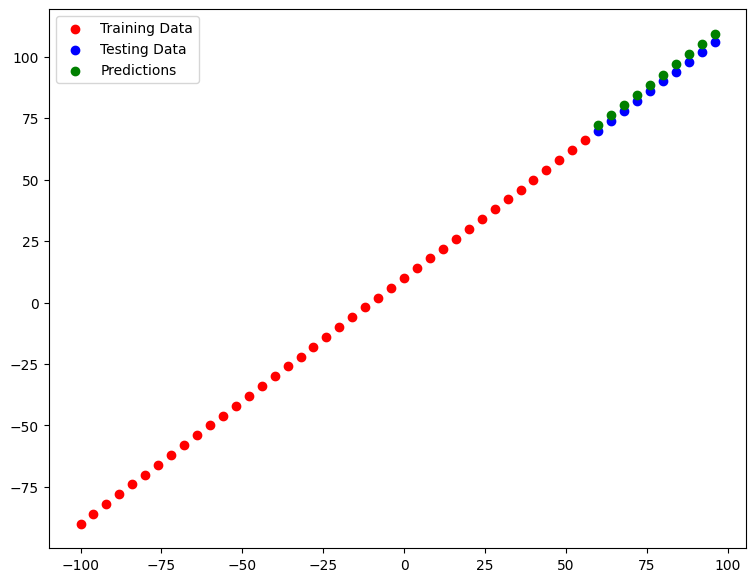

In [97]:
# Set random seed
tf.random.set_seed(28)

# 1. Create the model
model_3 = tf.keras.Sequential(name = 'Model_2')
model_3.add(tf.keras.layers.Dense(100, input_shape = [1], activation = 'relu'))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['mae'])

# Fit the model
model_3.fit(tf.expand_dims(train_X, axis = 1), train_y, epochs = 200, verbose = 0)

# Predicting with the model
pred_y3 = model_3.predict(test_X)

# Visualizing the predictions
plot_predictions(predictions = pred_y3)

# Calculating MAE and MSE
mae_3 = calculate_mae(test_y, pred_y3)
mse_3 = calculate_mse(test_y, pred_y3)

# Printing MAE and MSE
print(f'MAE: {mae_3}\nMSE: {mse_3}')

### Comparing the results of our experiments

In [98]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = pd.DataFrame([['model_1', mae_1.numpy(), mse_1.numpy()],
                             ['model_2', mae_2.numpy(), mse_2.numpy()],
                              ['model_3', mae_3.numpy(), mse_3.numpy()]], columns = ['MODEL', 'MAE', 'MSE'])

model_results


,MODEL,MAE,MSE
0,model_1,19.547541,384.703613
1,model_2,2.537031,6.552080
2,model_3,2.738608,7.657548


In [99]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Saving our Model

There are two main formats we can save our models:
1. The SavedModel format
2. The HDF5 format

In [100]:
# Save model using svdm format
model_2.save('best_model_svdm_format')

In [101]:
# Save model using svdm format
model_2.save('best_model_hdf5_format.h5')

## Loading a Saved Model

In [102]:
# Load in a svdm format model
best_model_svdm_format = tf.keras.models.load_model('best_model_svdm_format')

In [103]:
# Load in a hdf5 format model
best_model_hdf5_format = tf.keras.models.load_model('best_model_hdf5_format.h5')

## Download a file or model from Google Colab

In [ ]:
# Download a files from Google Colab
from google.colab import files
files.download('model_path')

In [105]:
# Save a file from Google Colab to Google Drive
!cp model_path /drive/model_path

cp: cannot stat 'model_path': No such file or directory


## A larger Example

### Importing Libraries

In [186]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [107]:
# Importing warnings and filtering warnings to ignore
import warnings as wn
wn.filterwarnings('ignore')

### Reading the DataFrame

In [108]:
# Reading the csv file
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Preprocessing

In [109]:
# Finding count, mean etc.
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [110]:
# Finding information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [111]:
# Finding the shape
insurance.shape

(1338, 7)

In [112]:
# Finding the null values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [113]:
# Extracting Categorical columns
cat_col = insurance.select_dtypes(include = ['object']).columns

# One hot encoding the dataframe
insurance_enc = pd.get_dummies(insurance[cat_col], drop_first = True)
insurance_enc = pd.concat([insurance, insurance_enc], axis = 1)
insurance_enc.drop(insurance[cat_col], axis = 1, inplace = True)

insurance_enc

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [187]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all these values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

### Data Visualization

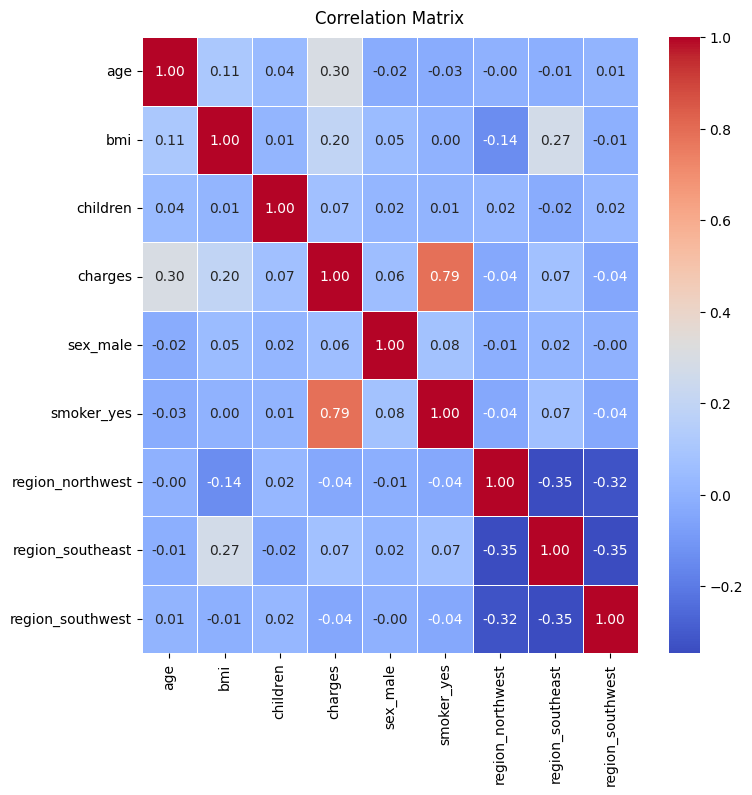

In [114]:
# @title **Generating the correlation matrix**
corr_mat = insurance_enc.corr()

# Visualizing the matrix
plt.figure(figsize = (8, 8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .6)
plt.title('Correlation Matrix', pad = 10)
plt.show()

<Axes: xlabel='smoker_yes', ylabel='charges'>

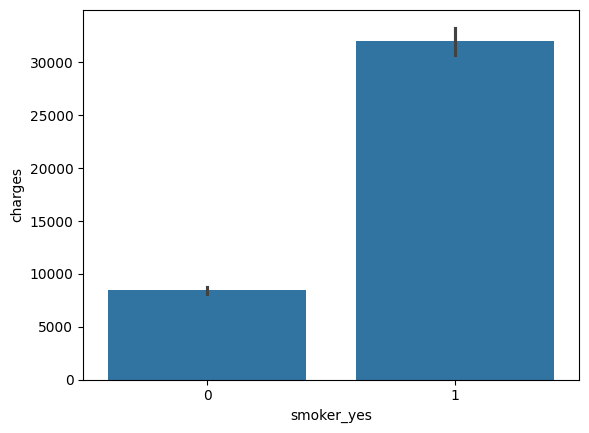

In [115]:
# @title **Relationship between Smoker_yes and Charges**
sns.barplot(data = insurance_enc, x = insurance_enc.smoker_yes, y = insurance_enc.charges)

<Axes: xlabel='region_northwest', ylabel='charges'>

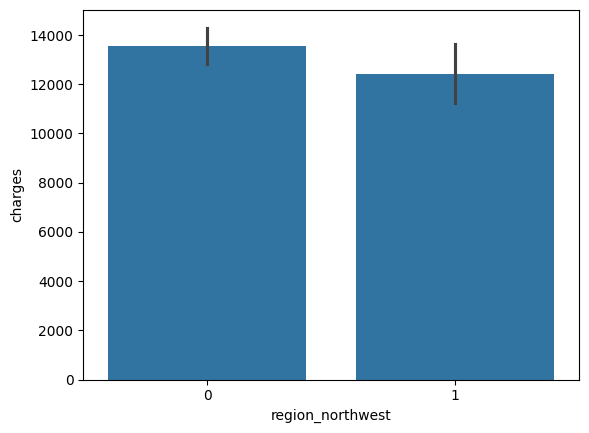

In [116]:
# @title **Relationship between Region (NorthWest) and Charges**
sns.barplot(data = insurance_enc, x = insurance_enc['region_northwest'], y = insurance_enc.charges)

<Axes: xlabel='region_southeast', ylabel='charges'>

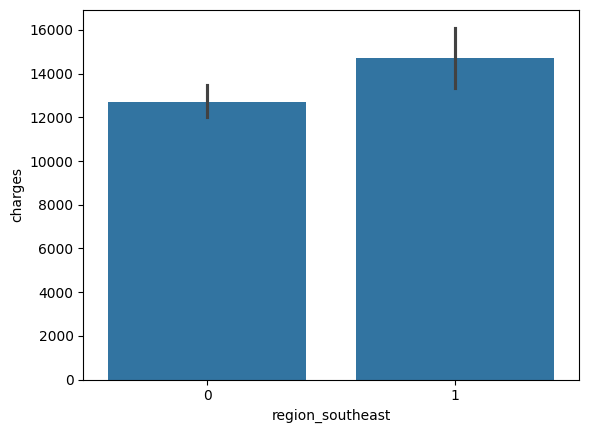

In [117]:
# @title **Relationship between Region (SouthEast) and Charges**
sns.barplot(data = insurance_enc, x = insurance_enc['region_southeast'], y = insurance_enc.charges)

<Axes: xlabel='region_southwest', ylabel='charges'>

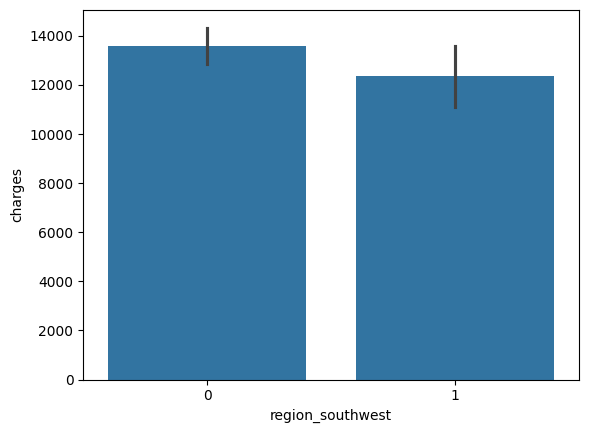

In [118]:
# @title **Relationship between Region (SouthWest) and Charges**
sns.barplot(data = insurance_enc, x = insurance_enc['region_southwest'], y = insurance_enc.charges)

<Axes: xlabel='bmi', ylabel='charges'>

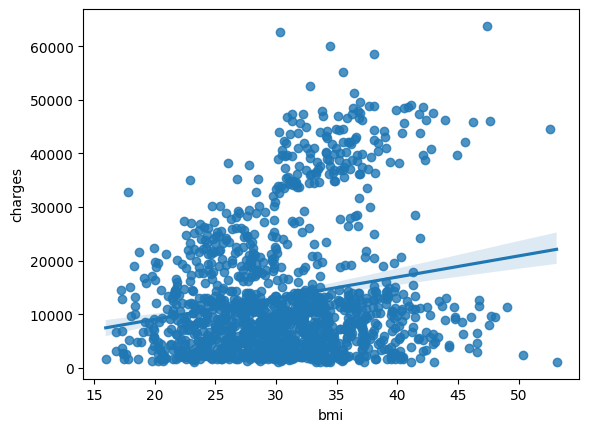

In [119]:
# @title **Relationship between BMI and Charges**
sns.regplot(data = insurance_enc, x = insurance_enc.bmi, y = insurance_enc.charges)

<Axes: xlabel='age', ylabel='charges'>

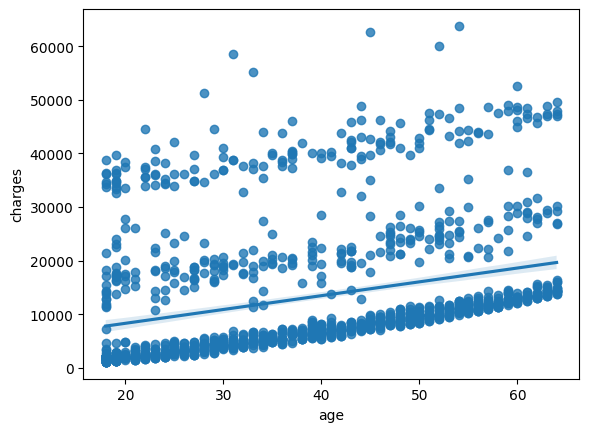

In [120]:
# @title **Relationship between Age and Charges**
sns.regplot(data = insurance_enc, x = insurance_enc.age, y = insurance_enc.charges)

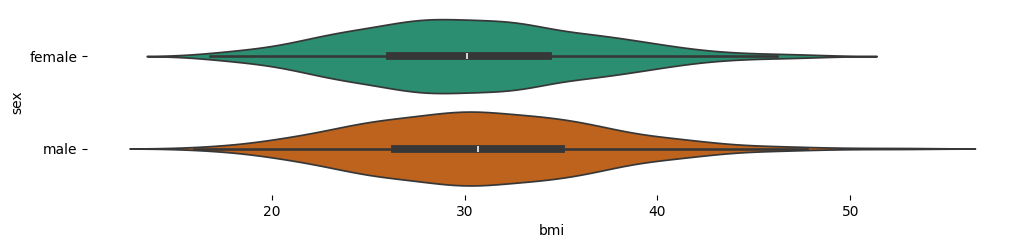

In [121]:
# @title **sex vs bmi**
figsize = (12, 1.2 * len(insurance['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='bmi', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

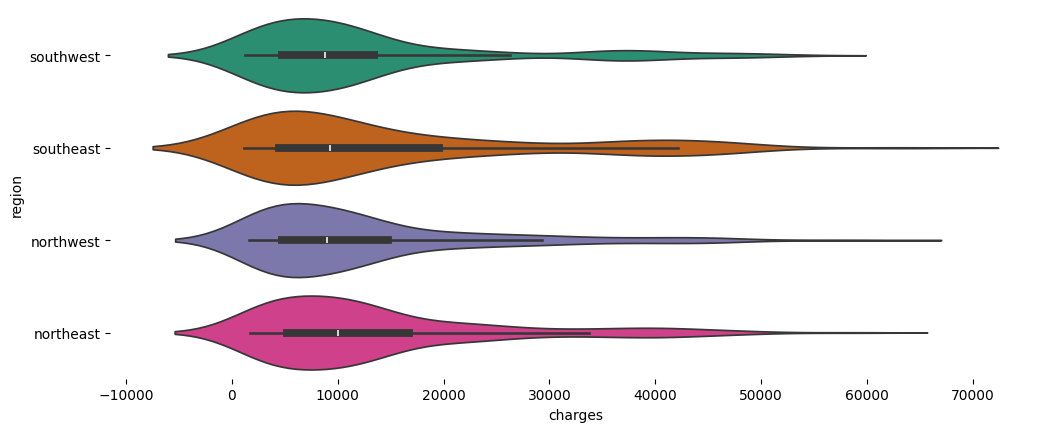

In [122]:
# @title **region vs age**
figsize = (12, 1.2 * len(insurance['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='charges', y='region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

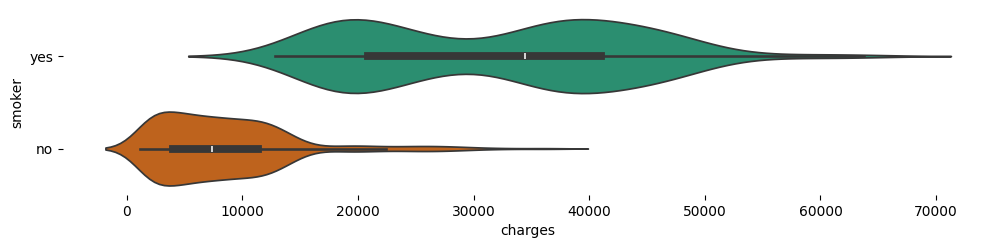

In [123]:
# @title **smoker vs age**
figsize = (12, 1.2 * len(insurance['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='charges', y='smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

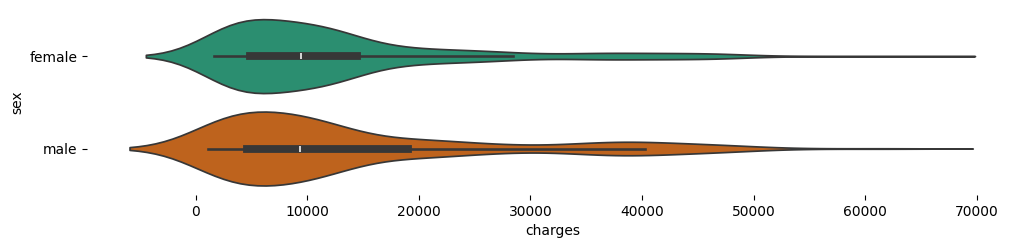

In [124]:
# @title **sex vs age**
figsize = (12, 1.2 * len(insurance['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='charges', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

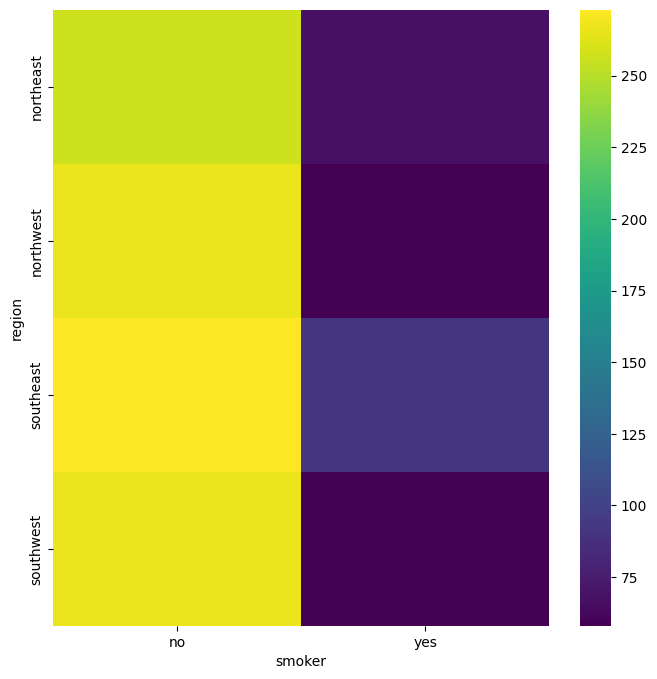

In [125]:
# @title **smoker vs region**
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in insurance.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

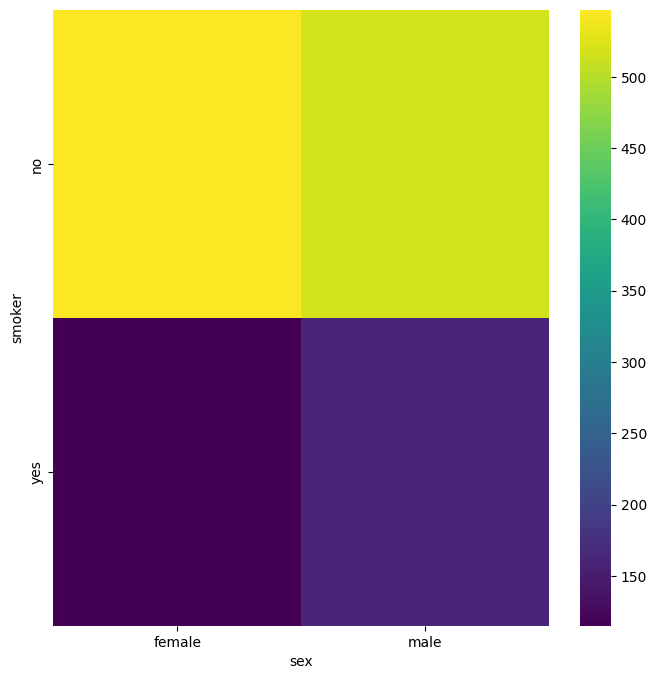

In [126]:
# @title **sex vs smoker**
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in insurance.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

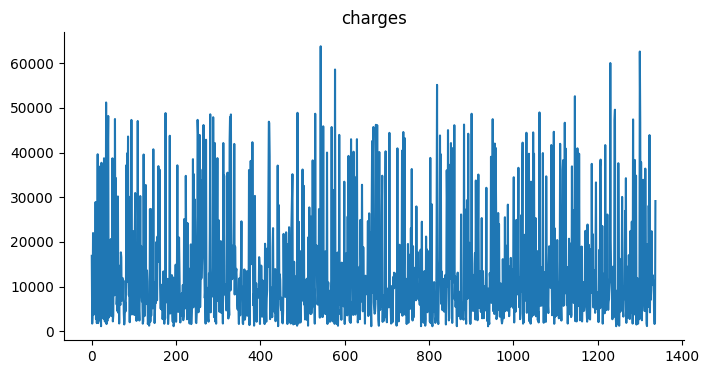

In [127]:
# @title **charges**
insurance['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

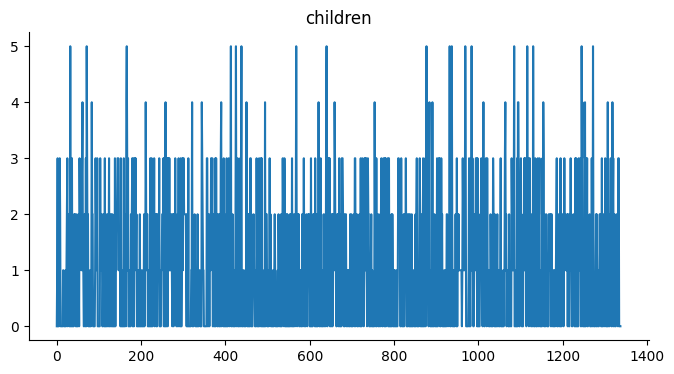

In [128]:
# @title **children**
insurance['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

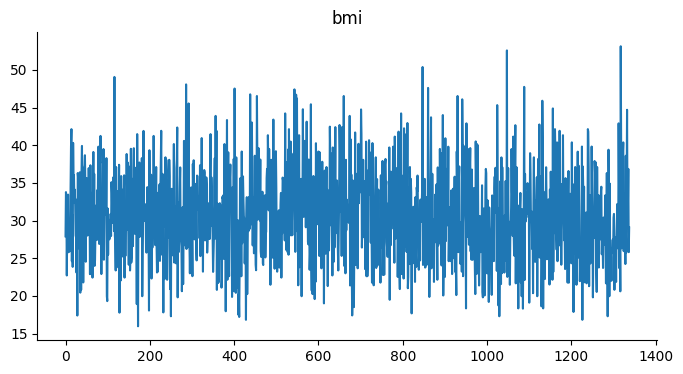

In [129]:
# @title **bmi**
insurance['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

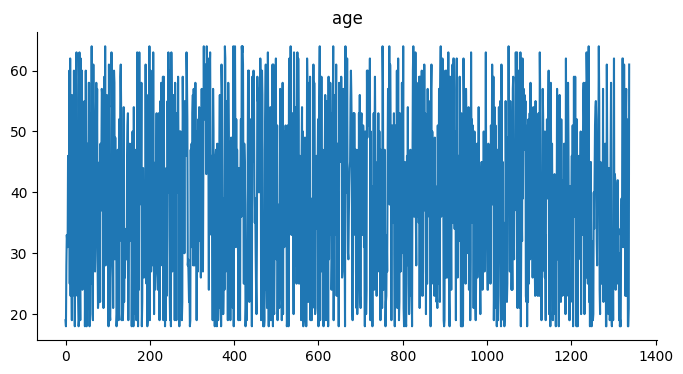

In [130]:
# @title **age**
insurance['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

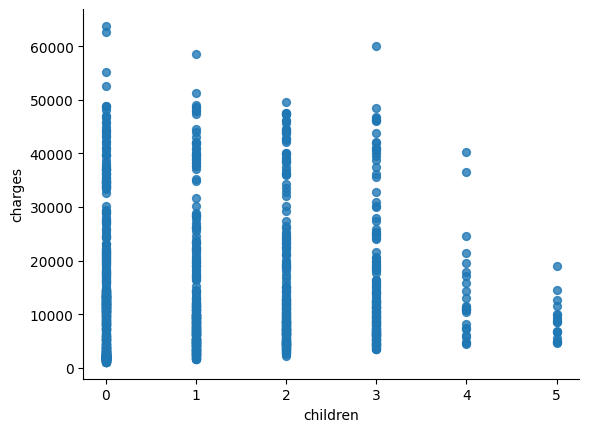

In [131]:
# @title **children vs charges**
insurance.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

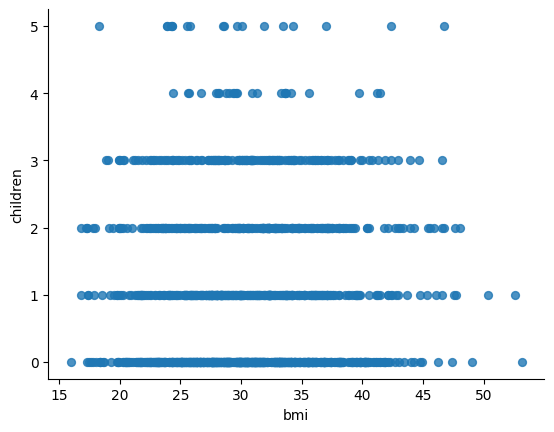

In [132]:
# @title **bmi vs children**
insurance.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

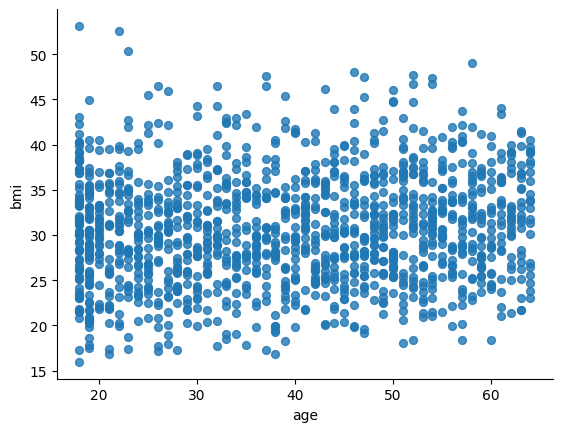

In [133]:
# @title **age vs bmi**
insurance.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

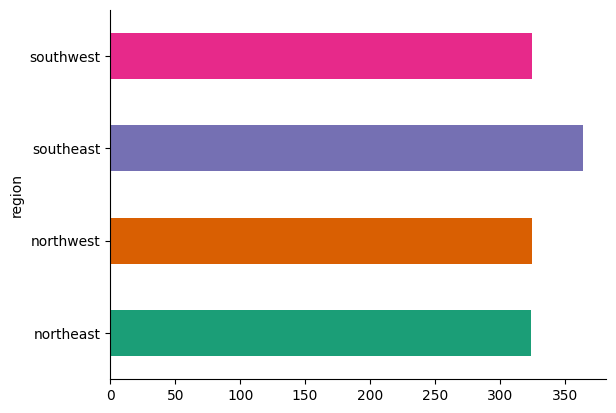

In [134]:
# @title **region**
insurance.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

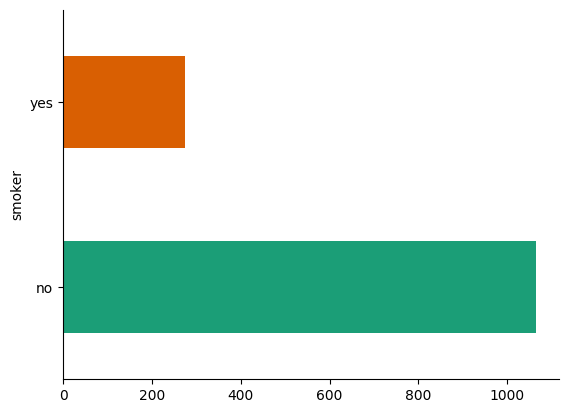

In [135]:
# @title **smoker**
insurance.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

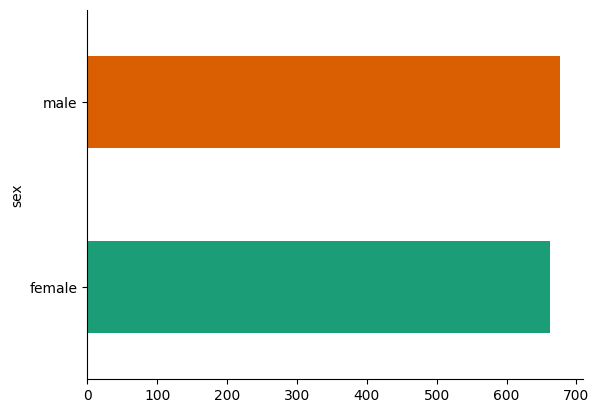

In [136]:
# @title **sex**
insurance.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

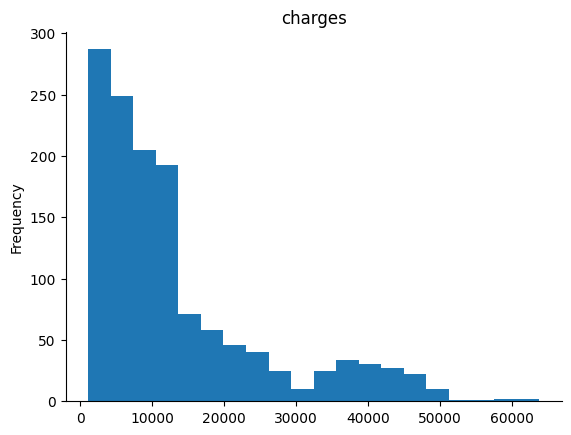

In [137]:
# @title **charges**
insurance['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

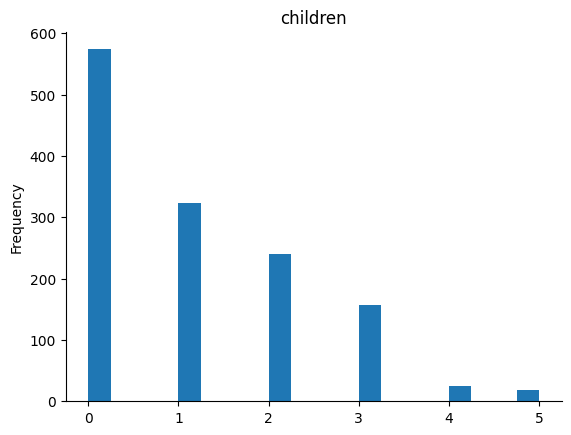

In [138]:
# @title **children**
insurance['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

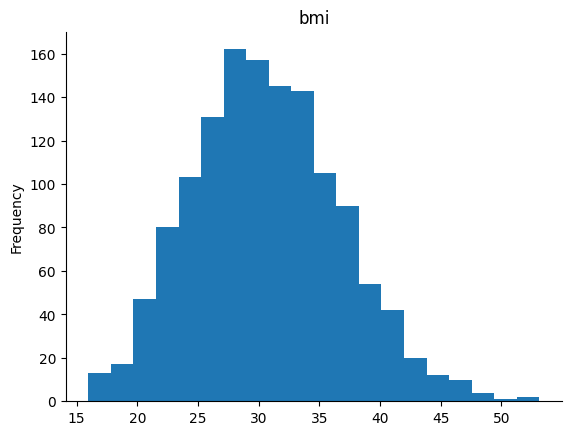

In [139]:
# @title **bmi**
insurance['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

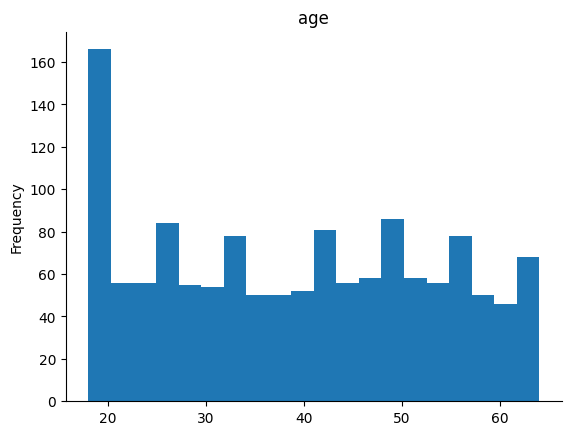

In [140]:
# @title **age**
insurance['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Creating a Neural Network

In [189]:
# Creating Features and labels
X = insurance.drop('charges', axis = 1)
y = insurance.charges

# Creating Train and Test Splits
train_X, test_X, train_y, test_y = split(X, y, train_size = 0.7, random_state = 28)

# Fit the column transformer
ct.fit(train_X)

# Transforming training and test data with normalization (MinMaxScaler) and OneHotEncoder
train_X_normal = ct.transform(train_X)
test_X_normal = ct.transform(test_X)

In [190]:
# Looking at the shape of the data
train_X_normal.shape, test_X_normal.shape

((936, 11), (402, 11))

In [159]:
# Looking at the dimension of train set
train_X.ndim, train_y.ndim

(2, 1)

In [191]:
# @title **Creating our Model**
# Setting a random seed
tf.random.set_seed(28)

model = tf.keras.Sequential(name = 'Insurance_model')
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

# Fitting the model
history = model.fit(train_X_normal, train_y, epochs = 200, verbose = 0)

# Predicting with the model
pred_y = model.predict(test_X_normal)

# Calculating the MAE and MSE
mae = calculate_mae(test_y, pred_y)
mse = calculate_mse(test_y, pred_y)

# Print the MAE and MSE
print(f'MAE: {mae:.2f}\nMSE: {mse:}')

13/13 [==============================] - 0s 3ms/step
MAE: 1908.45
MSE: 26825448.0


In [193]:
# Evaluating the model
model.evaluate(test_X_normal, test_y)

13/13 [==============================] - 0s 4ms/step - loss: 1908.4529 - mae: 1908.4529


[1908.452880859375, 1908.452880859375]

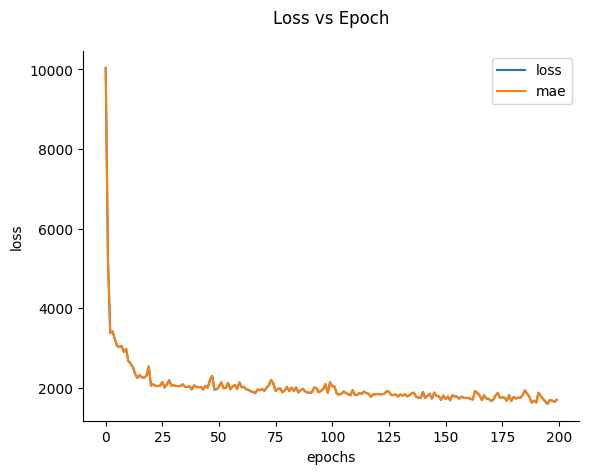

In [194]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Loss vs Epoch', pad = 20)
plt.gca().spines[['top', 'right']].set_visible(False)